### multivariate rational expectations model
### PS7 Q2


In [4]:
from __future__ import print_function
import ipywidgets as widgets
from ipywidgets import interact, interact_manual, interactive, fixed
from IPython.display import display

import random
import sympy as sym
import numpy as np
from sympy import lambdify
from numpy import linalg as LA
import matplotlib.pyplot as plt
import seaborn as sns



In [5]:
def fltsld_init(initial):
    floatsld = widgets.FloatSlider(
            min=0.01,
            max=0.99,
            value=initial,
            step=0.000001,
            continuous_update=False)
    return floatsld

def intsld_init(maxnum, initial):
    intsld = widgets.IntSlider(
            min=0,
            max=maxnum,
            value=initial,
            step=1,
            continuous_update=False)
    return intsld


text = widgets.Text(
    value='0, -0.005, -0.009, -0.013, -0.022, -0.021, -0.019, -0.011, -0.012, -0.003',
    placeholder='Type something',
    description='s_given',
    disabled=False,
    continuous_update=False
)
def s_given_process(s_given, T_g):
    s_list = []
    if s_given == '':
            display('at least 1st period s is required')
            raise Exception()    
    for i in s_given.split(","):
         if float(i) > 1 or float(i) < -1:
            display('s_given should be number between 1 & -1')
            raise Exception()
         else:
            s_list.append(float(i))
    T_sgiven =  len(s_list)
    if T_sgiven > T_g:
        display('given period should be smaller than total period')
        raise Exception()
    return s_list, T_sgiven


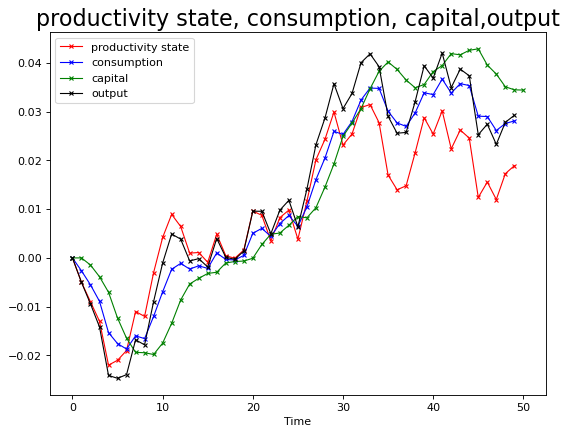

<function __main__.input(delta, rho, alpha, beta, T_g, std_v, seed_num, s_given)>

In [6]:
def input(delta, rho, alpha, beta, T_g, std_v, seed_num, s_given):
    s_given, T_sgiven = s_given_process(s_given, T_g)

    #Getting non-stochastic steady-state values
    k_bar = ((1/beta - 1 + delta)/alpha)**(1/(alpha - 1))
    c_bar = k_bar**alpha  - delta*k_bar
    s_bar = 1

    #Describing relationships underlying linear coefficients
    a1 = beta*alpha*(alpha - 1)*k_bar**(alpha - 1)
    a2 = beta*alpha*k_bar**(alpha - 1)
    b1 = 1 - delta + alpha*k_bar**(alpha - 1)
    b2 = k_bar**(alpha - 1)
    b3 = -c_bar/k_bar
    
    #Writing dynamic equilibrium conditions into matrix form
    m371 =  np.zeros([3,3])
    m371[0, 0] = -1
    m371[1, 0] = b3
    m371[1, 1] = b1
    m371[1, 2] = b2
    m371[2, 2] = rho

    m372 =  np.zeros([3,3])
    m372[0, 0] = -1
    m372[0, 1] = a1
    m372[0, 2] = a2
    m372[1, 1] = 1
    m372[2, 2] = 1

    m38 = np.linalg.inv(m371)
    A = np.dot(m38, m372)

    #Calculate Eigenvectors and Eigenvalues of A
    Lam_temp, Q_temp = LA.eig(A)
    
    #make stable eigenvalue and the corresponding eigenvector in the first positions 
    idx = Lam_temp.argmin()
    Lam = np.r_[Lam_temp[idx], Lam_temp[: idx], Lam_temp[idx + 1:]]
    Q = np.c_[Q_temp[:, idx], Q_temp[:, : idx], Q_temp[:, idx + 1:]]

    #A = QΛQ_inv
    Q_inv = np.linalg.inv(Q)
    
    #key restriction
    #get free var consumption as function of capital, productivity-state
    c_coeff_k = -Q_inv[0, 1]/Q_inv[0, 0]
    c_coeff_s = -Q_inv[0, 2]/Q_inv[0, 0]
    
    #productivity values
    s_t = [] + s_given

    random.seed(seed_num)
    #Obtain productivity levels
    for t in range(T_sgiven, T_g):
        s_t.append(rho*s_t[-1] + std_v * random.uniform(-1, 1))
        
    k_t = [0]
    c_t = []
    y_t = []
    #Generate time series variables = the given shock realizations
    for t in range(T_g):
        c_t.append(c_coeff_k*k_t[t] + c_coeff_s*s_t[t])
        y_t.append(s_t[t] + alpha*k_t[t])
        k_t.append(b1*k_t[t] + b2*s_t[t] + b3*c_t[t])
        
    plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
    plt.plot(list(range(0, T_g)), s_t, marker='x', markerfacecolor='red', markersize=4, color='red', linewidth=1, label='productivity state')
    plt.plot(list(range(0, T_g)), c_t, marker='x', markerfacecolor='blue', markersize=4, color='blue', linewidth=1, label='consumption')
    plt.plot(list(range(0, T_g + 1)), k_t, marker='x', markerfacecolor='green', markersize=4, color='green', linewidth=1, label='capital')
    plt.plot(list(range(0, T_g)), y_t, marker='x', markerfacecolor='black', markersize=4, color='black', linewidth=1, label='output')

    plt.xlabel('Time')
    plt.title('productivity state, consumption, capital,output',FontSize = 20)

    plt.legend()
    plt.show()

test = interact(input, delta=fltsld_init(0.1), rho=fltsld_init(0.9), alpha=fltsld_init(0.3), beta=fltsld_init(0.95), T_g=intsld_init(10000, 50), std_v=fltsld_init(0.007), seed_num=intsld_init(1000,0), s_given=text)
display(test)